In [1]:
import sys
sys.path.append('../build')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import reflexxes_motion_library

In [4]:
dofs = 3
cycle_time = 0.1
rml = reflexxes_motion_library.ReflexxesAPI(dofs, cycle_time)

In [5]:
ip = reflexxes_motion_library.PositionInputParameters(dofs)
op = reflexxes_motion_library.PositionOutputParameters(dofs)
flags = reflexxes_motion_library.PositionFlags()

In [6]:
ip.current_position_vector = [100.0, 0.0, 50.0]
ip.current_velocity_vector = [100.0, -220.0, -50.]
ip.current_acceleration_vector = [-150.0, 250.0, -50.0]

In [7]:
ip.max_velocity_vector = [300.0,100.0,300.0]
ip.max_acceleration_vector = [300.0,200.0,300.0]
ip.max_jerk_vector = [400.0,300.0,200.0]

In [8]:
ip.target_position_vector = [-600.0,-200.0,-350.0]
ip.target_velocity_vector = [50.0,-50.0,200.0]

In [9]:
ip.selection_vector = [True, True, True]

In [10]:
pos = []
vel = []
acc = []

result_value = reflexxes_motion_library.ResultValue.WORKING
cycle = 0
while reflexxes_motion_library.ResultValue(result_value) != reflexxes_motion_library.FINAL_STATE_REACHED:
    result_value = rml.position(ip, op, flags)
    
    pos.append(op.new_position_vector)
    vel.append(op.new_velocity_vector)
    acc.append(op.new_acceleration_vector)
    
    ip.current_position_vector = op.new_position_vector
    ip.current_velocity_vector = op.new_velocity_vector
    ip.current_acceleration_vector = op.new_acceleration_vector

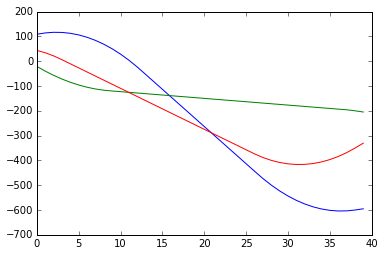

In [11]:
plt.plot(pos);

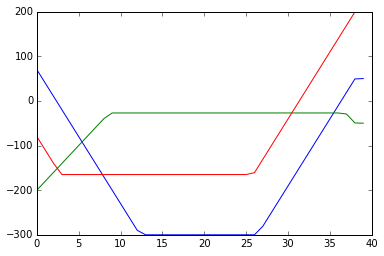

In [12]:
plt.plot(vel);

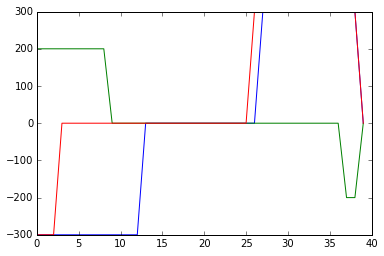

In [13]:
plt.plot(acc);